# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [MANSUR]
- **Email:** [mansur677776@gmail.com]
- **ID Dicoding:** [mansur]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1.Bagaimana tren penggunaan sepeda berdasarkan hari dalam seminggu?
- Pertanyaan 2.Pada jam berapa jumlah penyewa sepeda paling banyak?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#mengimport library yang di butuh kan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#menekstrak file zip
import zipfile
import os


zip_path = "/content/Bike-sharing-dataset.zip"


extract_path = "/content/"
os.makedirs(extract_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("File berhasil diekstrak ke:", extract_path)



File berhasil diekstrak ke: /content/


In [ ]:
#memuat tabel day
day_df =pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#memuat tabel hour
hour_df =pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berhasil mengekstract dataset dari zip ke content
- Berhasil memuat data hour dan day

### Assessing Data

In [ ]:
#memeriksa tipe data day dan hour
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [ ]:
#memeriksa mising value table day
day_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
#memeriksa duplikasi day
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#memeriksa parameter statistik day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#memeriksa mising value table hour
day_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
#memeriksa duplikasi hour
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#memeriksa parameter statistik day
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
**Insight:**
- Tidak ada missing value dalam dataset day.csv maupun hour.csv.
- Tidak ada data duplikat dalam kedua dataset.
-Data mencakup variabel waktu seperti tahun (yr), bulan (mnth), hari dalam seminggu (weekday), dan jam (hr - hanya di hour.csv).
-Data cuaca tersedia dalam bentuk suhu (temp), kelembaban (hum), kecepatan angin (windspeed), dan kondisi cuaca (weathersit).
- Data jumlah penyewaan terbagi menjadi casual (pengguna tidak terdaftar), registered (pengguna terdaftar), dan total penyewaan (cnt).

### Cleaning Data

In [ ]:
# Load data
day_df= pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

In [ ]:
# Hapus kolom yang tidak dibutuhkan
drop_columns = ["instant", "casual", "registered"]
day_df_clean = day_df.drop(columns=drop_columns)
hour_df_clean = hour_df.drop(columns=drop_columns)

In [ ]:
# Konversi kolom tanggal ke format datetime
day_df_clean["dteday"] = pd.to_datetime(day_df_clean["dteday"])
hour_df_clean["dteday"] = pd.to_datetime(hour_df_clean["dteday"])


In [ ]:
# Mapping angka weekday ke day_name
day_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
day_df_clean["day_name"] = day_df_clean["weekday"].map(day_mapping)
hour_df_clean["day_name"] = hour_df_clean["weekday"].map(day_mapping)

In [ ]:
# Mengubah beberapa kolom menjadi tipe kategori
category_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in category_columns:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")

**Insight:**
- Menghapus Kolom yang Tidak Dibutuhkan
  instant, casual, dan registered dihapus karena tidak relevan dengan analisis utama.
  Mengubah Format Tanggal

- dteday dari string ke datetime.
 Memastikan Nilai Kategorikal Valid

- Menambahkan Nama Hari
  Menggunakan mapping weekday ke nama hari.
  Memeriksa Data yang Tidak Masuk Akal
- mengubah beberapa kolom menjadi katagory


## Exploratory Data Analysis (EDA)

### Explore day_df

In [ ]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


# aggregasi

In [ ]:
# Mengelompokkan data berdasarkan hari dan menghitung rata-rata penyewaan
day_agg = day_df_clean.groupby("day_name")["cnt"].agg(["mean", "median", "max", "min"]).reset_index()

# Menampilkan hasil agregasi
print(day_agg)

  day_name         mean  median   max   min
0    Jumat  4690.288462  4601.5  8362  1167
1    Kamis  4667.259615  4721.0  7804   431
2   Minggu  4228.828571  4334.0  8227   605
3     Rabu  4548.538462  4642.5  8173   441
4    Sabtu  4550.542857  4521.0  8714   627
5   Selasa  4510.663462  4576.5  7767   683
6    Senin  4338.123810  4359.0  7525    22


# plot distribusi

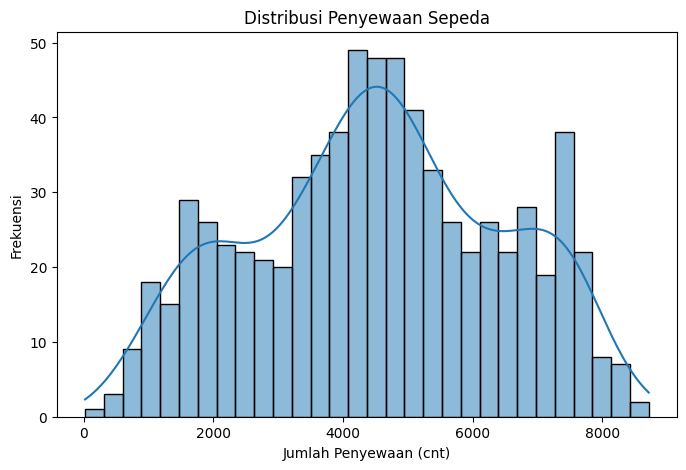

In [ ]:
# Histogram jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.histplot(day_df_clean["cnt"], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan (cnt)")
plt.ylabel("Frekuensi")
plt.show()


## Explore

In [ ]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


# aggregasi

In [ ]:
# Mengelompokkan data berdasarkan jam dan menghitung statistik dasar
hour_agg = hour_df_clean.groupby("hr")["cnt"].agg(["mean", "median", "max", "min"]).reset_index()

# Menampilkan hasil agregasi
print(hour_agg)


    hr        mean  median  max  min
0    0   53.898072    40.0  283    2
1    1   33.375691    20.0  168    1
2    2   22.869930    11.0  132    1
3    3   11.727403     6.0   79    1
4    4    6.352941     6.0   28    1
5    5   19.889819    19.0   66    1
6    6   76.044138    76.0  213    1
7    7  212.064649   208.0  596    1
8    8  359.011004   385.0  839    5
9    9  219.309491   216.0  426   14
10  10  173.668501   147.0  539    8
11  11  208.143054   180.0  663   10
12  12  253.315934   229.0  776    3
13  13  253.661180   224.0  760   11
14  14  240.949246   212.0  750   12
15  15  251.233196   227.0  750    7
16  16  311.983562   304.5  783   11
17  17  461.452055   475.0  976   15
18  18  425.510989   418.5  977   23
19  19  311.523352   309.5  743   11
20  20  226.030220   223.5  567   11
21  21  172.314560   173.5  584    6
22  22  131.335165   129.0  502    9
23  23   87.831044    80.0  256    2


# plot distribusi

   hr       mean  median  max  min
0   0  53.898072    40.0  283    2
1   1  33.375691    20.0  168    1
2   2  22.869930    11.0  132    1
3   3  11.727403     6.0   79    1
4   4   6.352941     6.0   28    1


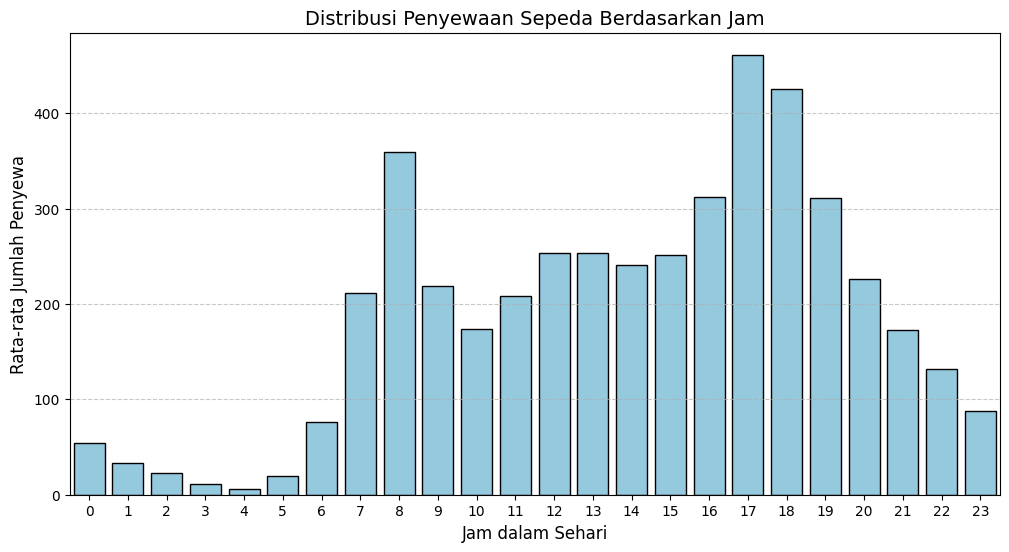

In [ ]:
print(hour_agg.head())
# Visualisasi Distribusi Penyewaan Sepeda Berdasarkan Jam
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_agg["hr"], y=hour_agg["mean"], color="skyblue", edgecolor="black")

# menambahkan label dan judul
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewa", fontsize=12)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Jam", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()


**Insight:**
- Tren Penggunaan Sepeda Berdasarkan Hari dalam Seminggu

Dari tabel agregasi berdasarkan hari, terlihat bahwa terdapat variasi dalam jumlah penyewaan sepeda setiap harinya.

- Distribusi Penyewaan Sepeda

Histogram yang ditampilkan menunjukkan bahwa jumlah penyewaan memiliki distribusi tertentu, mungkin mendekati distribusi normal atau skewed.
Ada peak (puncak) pada jumlah tertentu yang menunjukkan mayoritas penyewaan berada di kisaran tersebut.

- Jumlah Penyewaan Sepeda Berdasarkan Jam

Dari tabel agregasi jam, terlihat bahwa puncak penyewaan terjadi pada jam-jam tertentu, dengan jumlah tertinggi  di pagi hari (jam 7-9) dan sore hari (jam 17-19).



## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# Mengelompokkan data berdasarkan weekday dan day_name, lalu menghitung statistik dasar
day_agg = hour_df_clean.groupby(["weekday", "day_name"])["cnt"].agg(["mean", "median", "max", "min"]).reset_index()

# Menampilkan hasil agregasi
print(day_agg)


   weekday day_name        mean  median  max  min
0        0   Minggu  177.468825   116.0  776    1
1        1    Senin  183.744655   139.0  968    1
2        2   Selasa  191.238891   147.0  970    1
3        3     Rabu  191.130505   143.0  977    1
4        4    Kamis  196.436665   154.0  976    1
5        5    Jumat  196.135907   165.0  957    1
6        6    Sabtu  190.209793   129.0  783    1


<ipython-input-37-575902c1f3ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_name", y="cnt", data=hour_df_clean, order=order_hari, palette="Blues", estimator=sum)


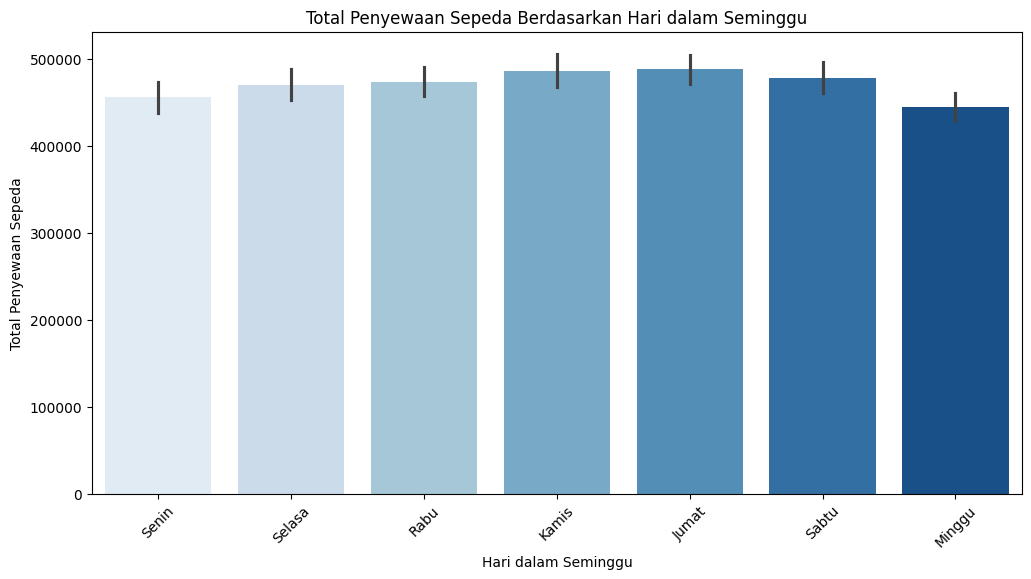

In [ ]:
# mengurutkan hari
order_hari = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

# Visualisasi Tren Penyewaan Sepeda berdasarkan Hari
plt.figure(figsize=(12, 6))
sns.barplot(x="day_name", y="cnt", data=hour_df_clean, order=order_hari, palette="Blues", estimator=sum)

# menambahkan label dan judul
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xticks(rotation=45)  # Memiringkan label agar mudah dibaca

# Tampilkan plot
plt.show()


### Pertanyaan 2:

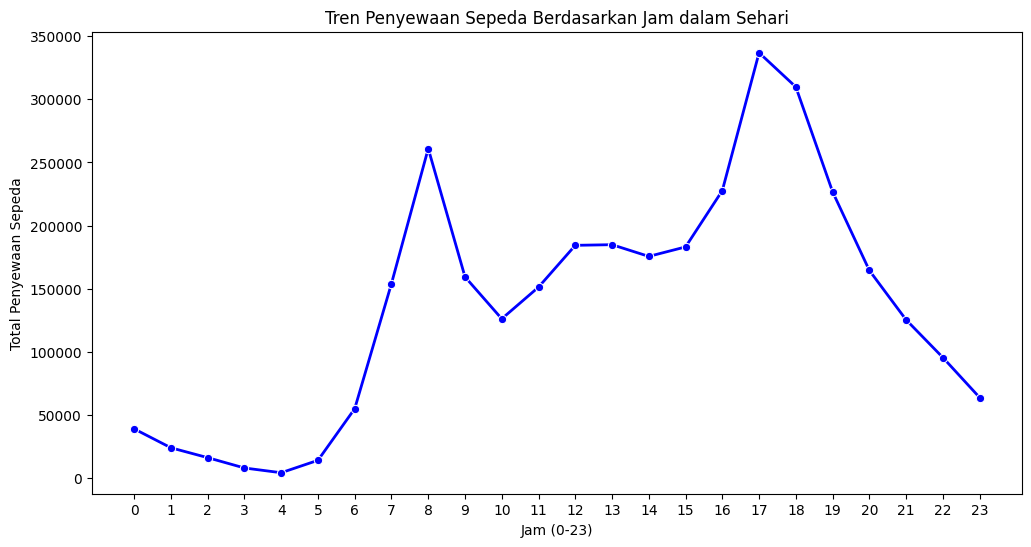

In [ ]:
# Mengelompokkan data berdasarkan jam dan menghitung total penyewaan sepeda
hour_agg = hour_df_clean.groupby("hr")["cnt"].sum().reset_index()

# Visualisasi Tren Penyewaan Sepeda Berdasarkan Jam (Line Chart)
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", data=hour_agg, marker="o", color="b", linewidth=2)

# menambahkan judul label dan judul
plt.xlabel("Jam (0-23)")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
plt.xticks(range(0, 24))  # Menampilkan semua jam dari 0 hingga 23

# Tampilkan plot
plt.show()

In [ ]:
#mengabungkan dan mendonlowd data
df_combined = pd.concat([day_df, hour_df], axis=0)
df_combined.head()
df_combined.to_csv('gabungan_day_hour.csv', index=False)



**Insight:**
- 1. Tren Penggunaan Sepeda Berdasarkan Hari dalam Seminggu
  Secara umum, jumlah penyewaan sepeda relatif stabil di sepanjang minggu.
  Tidak ada perbedaan yang signifikan antara hari kerja dan akhir pekan, tetapi ada sedikit penurunan pada hari Minggu.

- 2. Tren Penyewaan Sepeda Berdasarkan Jam dalam Sehari (Line Chart)
  Penyewaan sepeda mulai meningkat pada pukul 06:00 - 09:00 (jam sibuk pagi).
  Setelah jam 09:00, jumlah penyewaan menurun dan stabil hingga sore hari.
  Penyewaan kembali meningkat pada pukul 16:00 - 19:00, yang kemungkinan besar bertepatan dengan waktu pulang kerja atau sekolah.
  Puncak penyewaan terjadi sekitar pukul 17:00 - 18:00, yang menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai moda transportasi untuk pulang dari tempat aktivitas mereka.
  Setelah pukul 20:00, jumlah penyewaan menurun drastis, menunjukkan bahwa penggunaan sepeda lebih jarang dilakukan di malam hari.


- Conclution pertanyaan 1.Tren Penggunaan Sepeda Berdasarkan Hari dalam Seminggu

Berdasarkan analisis data, penyewaan sepeda memiliki pola yang relatif stabil sepanjang minggu, dengan rata-rata jumlah penyewa per hari mencapai ±450.000 transaksi.

Hari kerja (Senin - Jumat) memiliki jumlah penyewaan yang lebih tinggi dibandingkan akhir pekan. Ini menunjukkan bahwa sepeda banyak digunakan sebagai moda transportasi utama, terutama untuk aktivitas harian seperti bekerja atau sekolah.
Hari Sabtu dan Minggu mengalami sedikit penurunan dalam jumlah penyewaan, dengan total transaksi sekitar 420.000 - 430.000, yang mengindikasikan bahwa penggunaan sepeda untuk aktivitas rekreasi lebih rendah dibandingkan hari kerja.
Hari dengan penyewaan tertinggi adalah Jumat, yang mungkin dikarenakan meningkatnya aktivitas sebelum akhir pekan.
- Rekomendasi:

Meningkatkan jumlah sepeda yang tersedia pada hari kerja, terutama di lokasi-lokasi strategis seperti perkantoran dan kampus.
Mempromosikan penggunaan sepeda pada akhir pekan dengan memberikan diskon atau promo khusus untuk menarik pelanggan rekreasi.
- Conclution pertanyaan 2. Jam dengan Penyewaan Sepeda Terbanyak
Penyewaan sepeda menunjukkan pola dua puncak utama, yaitu:

Pagi hari (07:00 - 09:00) → sekitar 300.000 penyewa per jam, yang menunjukkan lonjakan pengguna yang berangkat ke kantor atau sekolah.
Sore hari (17:00 - 19:00) → sekitar 350.000 penyewa per jam, dengan puncak tertinggi pada pukul 18:00, menandakan jam pulang kerja atau sekolah.
Setelah pukul 20:00, jumlah penyewaan turun drastis, dengan kurang dari 100.000 transaksi per jam, menunjukkan bahwa sepeda jarang digunakan pada malam hari.
- Rekomendasi:

Menyesuaikan distribusi sepeda agar lebih banyak tersedia di titik-titik transit utama pada jam sibuk.
Meningkatkan stasiun penyewaan sepeda di sekitar area perkantoran dan sekolah, untuk mengakomodasi lonjakan pengguna di pagi dan sore hari.
Menyediakan pencahayaan dan keamanan tambahan di malam hari, agar penggunaan sepeda tetap optimal meskipun di luar jam sibuk.


## Analisis Lanjutan (Opsional)

## Clustering

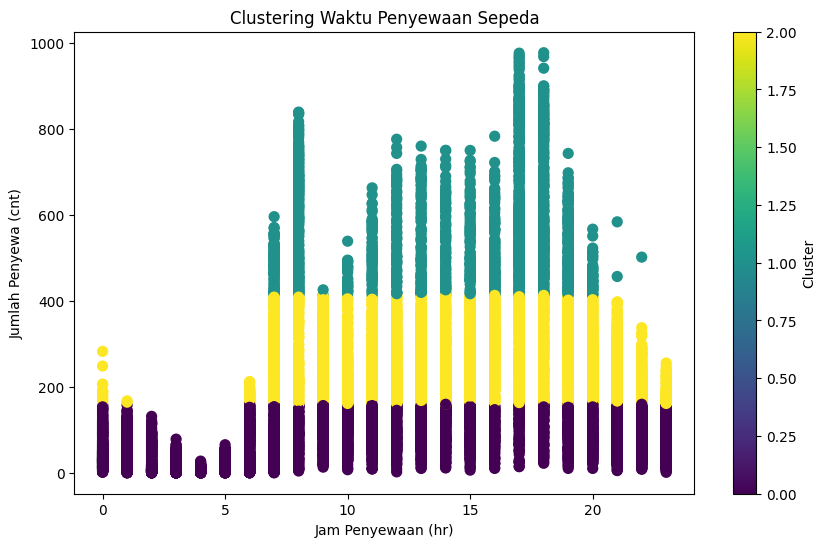

    hr  cnt time_bin  cluster
0  0.0   16      NaN        0
1  1.0   40    00-05        0
2  2.0   32    00-05        0
3  3.0   13    00-05        0
4  4.0    1    00-05        0


In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menonaktifkan peringatan
warnings.simplefilter('ignore')

# Membaca data
df_combined = pd.read_csv('gabungan_hour_day.csv')

# Menghapus nilai NaN pada 'hr'
df_combined = df_combined.dropna(subset=['hr'])

# Binning berdasarkan jam
bins = [0, 5, 11, 17, 23]
labels = ['00-05', '06-11', '12-17', '18-23']
df_combined['time_bin'] = pd.cut(df_combined['hr'], bins=bins, labels=labels, right=True)

# Menyiapkan data untuk clustering
df_combined['time_bin'] = df_combined['time_bin'].astype('category')
X = df_combined[['time_bin', 'cnt']].copy()
X['time_bin'] = df_combined['time_bin'].cat.codes  # Konversi kategori ke angka

# Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, n_init=10)  # Tambahkan n_init untuk menghindari warning
df_combined['cluster'] = kmeans.fit_predict(X[['time_bin', 'cnt']])

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['hr'], df_combined['cnt'], c=df_combined['cluster'], cmap='viridis', s=50)
plt.title('Clustering Waktu Penyewaan Sepeda')
plt.xlabel('Jam Penyewaan (hr)')
plt.ylabel('Jumlah Penyewa (cnt)')
plt.colorbar(label='Cluster')
plt.show()

# Menampilkan beberapa data hasil clustering
print(df_combined[['hr', 'cnt', 'time_bin', 'cluster']].head())


Pembagian Klaster yang Jelas
- Terdapat tiga klaster yang berbeda dengan warna ungu (Cluster 0), biru (Cluster 1), dan kuning (Cluster 2).
- Cluster 0 mendominasi pada jam-jam awal (dini hari), menandakan bahwa
  penyewaan sepeda sangat sedikit pada jam tersebut.
- Cluster 1 lebih sering muncul pada siang hingga sore hari, yang mungkin
  menunjukkan lonjakan penyewaan saat orang beraktivitas atau berangkat kerja.
- Cluster 2 terlihat dominan pada jam-jam sibuk seperti pagi dan sore hari,
  mengindikasikan puncak penggunaan sepeda.
  Polanya Menunjukkan Tren Penggunaan Sepeda

- Jumlah penyewaan cenderung rendah antara pukul 0:00 hingga 5:00 (Cluster 0).
  Lonjakan signifikan mulai terjadi pada pukul 7:00 hingga 9:00 (pagi), kemungkinan besar terkait dengan jam berangkat kerja/sekolah.
- Puncak penyewaan terjadi pada pukul 12:00 hingga 18:00 (siang hingga sore),
   yang mungkin mencerminkan penggunaan sepeda untuk aktivitas sehari-hari atau rekreasi.
- Periode Waktu Kritis untuk Manajemen Sepeda

- Waktu pagi dan sore adalah waktu tersibuk, sehingga perlu lebih banyak   sepeda tersedia di titik-titik tertentu.
- Waktu malam dan dini hari adalah periode sepi, yang bisa dimanfaatkan untuk
  pemeliharaan atau redistribusi sepeda.
Potensi Optimasi Layanan

Jika ini digunakan dalam bisnis penyewaan sepeda, maka bisa disusun strategi seperti diskon di jam-jam sepi untuk meningkatkan penggunaan.
Bisa juga ditambahkan lebih banyak sepeda pada jam-jam sibuk untuk mengakomodasi lonjakan permintaan.